# TimeSeries_DataViz


In [84]:
import pandas as pd

In [85]:
df=pd.read_csv('birth.csv.csv',header=0,parse_dates=[0])  # Don't forget to write this parse_dates=[o] in all time series prob

In [86]:
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


# Converting default index to datetime index 
This can be done by writing df['Name of the time datae column given in the question']

In [87]:
df.index=df['date'] #Here .index method is used to change the default index

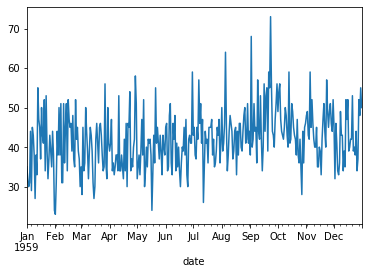

In [88]:
df['births'].plot()

In [89]:
df.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


# Set Y value
index value has already been set. It will work as x value. but now we have to set the value of Y also.

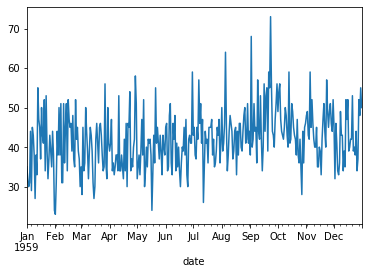

In [90]:
df['births'].plot()

# Zooming into Data

In [91]:
df1=df[(df['date']>'1959-01-01')&(df['date']<='1959-01-10')].copy()

In [92]:
df1.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


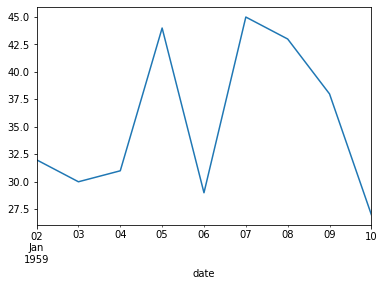

In [93]:
df1['births'].plot() # Here 'births' is the y component. 

# Trendline
Here for trendline we are going to use seeborn library

In [94]:
import seaborn as sns

In [99]:
df_sns=pd.read_csv('birth.csv.csv',header=0,parse_dates=[0])

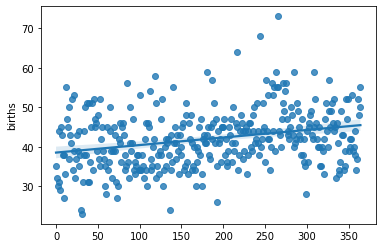

In [101]:
sns.regplot(x=df_sns.index.values,y=df_sns['births'])   # dataframe.index.values we have used 

# Using quadratic function and including order

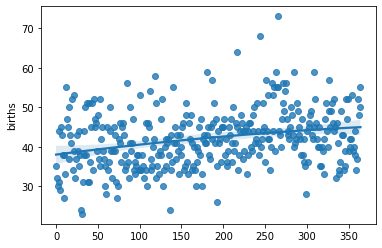

In [102]:
sns.regplot(x=df_sns.index.values,y=df_sns['births'],order=2)

# Removing seasonality from Data

In [110]:
df_season=pd.read_csv('airline.csv')

In [111]:
df_season.head()

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462


In [112]:
df_season=pd.read_csv('airline.csv',header=0,parse_dates=[0])

In [113]:
df_season.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


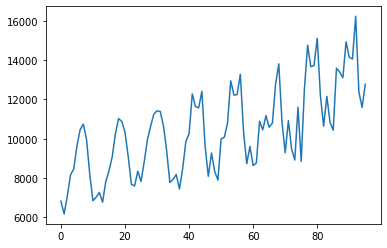

In [114]:
df_season['MilesMM'].plot()

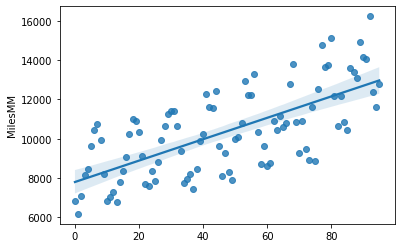

In [115]:
sns.regplot(x=df_season.index.values,y=df_season['MilesMM'])

In [117]:
df_season.head(12)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
5,1963-06-01,9644
6,1963-07-01,10466
7,1963-08-01,10748
8,1963-09-01,9963
9,1963-10-01,8194


# Adding year to datetime values
It is done by using .dt.year method. We do this operation on df_season['Month']. We write df_season['year]=df_season['Month'].dt.year
Here df_season['year'] is a new entrant

In [122]:
df_season['year']=df_season['Month'].dt.year

In [123]:
df_season

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963
...,...,...,...
91,1970-08-01,14057,1970
92,1970-09-01,16234,1970
93,1970-10-01,12389,1970
94,1970-11-01,11595,1970


# Use groupby function to take the aggregate
.groupby then inside the first bracket we write the column which we want to take the aggregate. Followed by a third bracket. inside the third bracket we need to write ['MilesMM'] becauses 

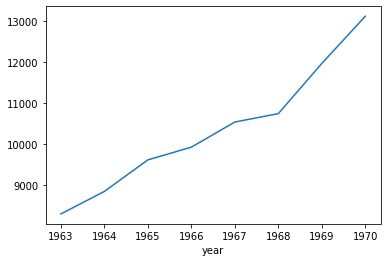

In [125]:
df_season.groupby('year')['MilesMM'].mean().plot()

# Lag function
Lag function is very important in time series calculation. Say for example in prediction models previous temperature might be quite handy in calculating future output. For this shift function maybe used. For this a lag variable or lag column can be created.

In [127]:
df_season['lag1']=df_season['MilesMM'].shift(1)   #By this we have created a new lag varible called df['lag1']

# Of the record let me remind you one thing! don't forget to put a '  ' inside df[' ']

In [128]:
df_season.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


# Creating a graph using lag1 values and MilesMM values.

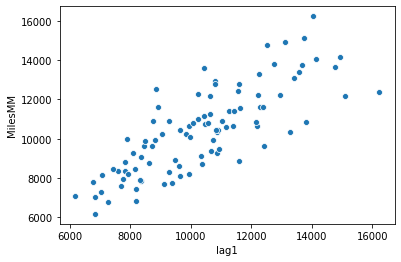

In [131]:
sns.scatterplot(x=df_season['lag1'],y=df_season['MilesMM'])

There is another way of ploting the lag function by default. Using pandas lag of 1 can be created directly.

In [132]:
from pandas.plotting import lag_plot

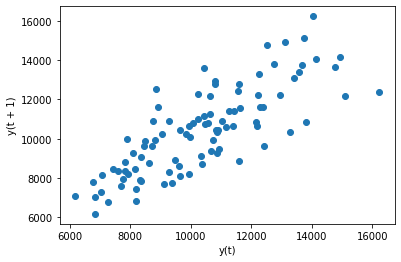

In [134]:
lag_plot(df_season['MilesMM'])

In [136]:
df_season['lag2']=df_season['MilesMM'].shift(2)

In [137]:
df_season.head()

,Month,MilesMM,year,lag1,lag2
0,1963-01-01,6827,1963,NaN,NaN
1,1963-02-01,6178,1963,6827.0,NaN
2,1963-03-01,7084,1963,6178.0,6827.0
3,1963-04-01,8162,1963,7084.0,6178.0
4,1963-05-01,8462,1963,8162.0,7084.0


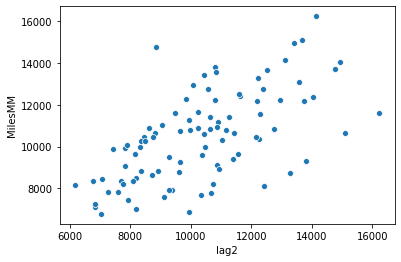

In [138]:
sns.scatterplot(x=df_season['lag2'],y=df_season['MilesMM'])

# Instead of using shift function everytime we can use auto corelation. In this method there is no need to use .shift to create lag variable. 

In [141]:
from pandas.plotting import autocorrelation_plot

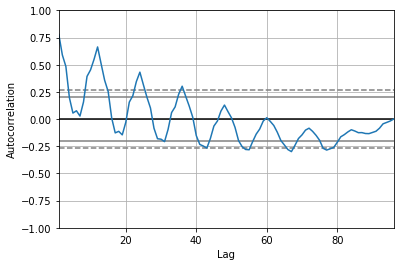

In [142]:
autocorrelation_plot(df_season['MilesMM'])